In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Load data
---

We'll use [Yahoo! Finance](https://finance.yahoo.com/quote/AAPL) to get a few years worth of stock prices from Apple, Inc. (AAPL)

In [2]:
# Load data
df = pd.read_csv('../datasets/AAPL.csv')
df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2017-07-28  149.889999  150.229996  149.190002  149.500000  145.004379   
1  2017-07-31  149.899994  150.330002  148.130005  148.729996  144.257507   
2  2017-08-01  149.100006  150.220001  148.410004  150.050003  145.537842   
3  2017-08-02  159.279999  159.750000  156.160004  157.139999  152.414627   
4  2017-08-03  157.050003  157.210007  155.020004  155.570007  150.891830   

     Volume  
0  17213700  
1  19845900  
2  35368600  
3  69936800  
4  27097300

In [3]:
# Change date column to be datetime dtype
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

## Set the `Date` column to be the index
---

We'll be exploring a few `pandas` methods related to time series data. In order for them to work we need to set the `Date` column to be the index.

In [4]:
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

In [5]:
df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-07-28  149.889999  150.229996  149.190002  149.500000  145.004379   
2017-07-31  149.899994  150.330002  148.130005  148.729996  144.257507   
2017-08-01  149.100006  150.220001  148.410004  150.050003  145.537842   
2017-08-02  159.279999  159.750000  156.160004  157.139999  152.414627   
2017-08-03  157.050003  157.210007  155.020004  155.570007  150.891830   

              Volume  
Date                  
2017-07-28  17213700  
2017-07-31  19845900  
2017-08-01  35368600  
2017-08-02  69936800  
2017-08-03  27097300

## Explore the data
---

- `Close`: The price of AAPL when the stock market closes (at 4:30pm ET)
- `Adj Close`: The closing price, when accounting for dividend payments, stock splits, etc.
- `High`: The highest price of AAPL during that trading day
- `Low`: The lowest price of AAPL during that trading day
- `Open`: The price of AAPL when the stock market opens (at 9:30am ET)
- `Volume`: How many shares of AAPL were traded that day

In [6]:
df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-07-28  149.889999  150.229996  149.190002  149.500000  145.004379   
2017-07-31  149.899994  150.330002  148.130005  148.729996  144.257507   
2017-08-01  149.100006  150.220001  148.410004  150.050003  145.537842   
2017-08-02  159.279999  159.750000  156.160004  157.139999  152.414627   
2017-08-03  157.050003  157.210007  155.020004  155.570007  150.891830   

              Volume  
Date                  
2017-07-28  17213700  
2017-07-31  19845900  
2017-08-01  35368600  
2017-08-02  69936800  
2017-08-03  27097300

## Filtering by dates
---

Now that our `Date` column is the index, we can filter our data in unique ways. Try `df['2018']` in the cell below:

In [7]:
df['2018']

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-02  170.160004  172.300003  169.259995  172.259995  168.339050   
2018-01-03  172.529999  174.550003  171.960007  172.229996  168.309738   
2018-01-04  172.539993  173.470001  172.080002  173.029999  169.091522   
2018-01-05  173.440002  175.369995  173.050003  175.000000  171.016678   
2018-01-08  174.350006  175.610001  173.929993  174.350006  170.381485   
2018-01-09  174.550003  175.059998  173.410004  174.330002  170.361954   
2018-01-10  173.160004  174.300003  173.000000  174.289993  170.322845   
2018-01-11  174.589996  175.490005  174.490005  175.279999  171.290329   
2018-01-12  176.179993  177.360001  175.649994  177.089996  173.059113   
2018-01-16  177.899994  179.389999  176.139999  176.190002  172.179611   
2018-01-17  176.149994  179.250000  175.070007  179.100006  175.023361   
2018-01-18  179.369995  180.100006  178.250000  179.259995  175.179718   
2018-01-19  178.610001  179.580002  177.410004  178.460007  174.397949   
2018-01-22  177.300003  177.779999  176.600006  177.000000  172.971176   
2018-01-23  177.300003  179.440002  176.820007  177.039993  173.010254   
2018-01-24  177.250000  177.300003  173.199997  174.220001  170.254440   
2018-01-25  174.509995  174.949997  170.529999  171.110001  167.215210   
2018-01-26  172.000000  172.000000  170.059998  171.509995  167.606140   
2018-01-29  170.160004  170.160004  167.070007  167.960007  164.136932   
2018-01-30  165.529999  167.369995  164.699997  166.970001  163.169464   
2018-01-31  166.869995  168.440002  166.500000  167.429993  163.618988   
2018-02-01  167.169998  168.619995  166.759995  167.779999  163.961014   
2018-02-02  166.000000  166.800003  160.100006  160.500000  156.846741   
2018-02-05  159.100006  163.880005  156.000000  156.490005  152.928009   
2018-02-06  154.830002  163.720001  154.000000  163.029999  159.319138   
2018-02-07  163.089996  163.399994  159.070007  159.539993  155.908569   
2018-02-08  160.289993  161.000000  155.029999  155.149994  151.618515   
2018-02-09  157.070007  157.889999  150.240005  156.410004  153.473022   
2018-02-12  158.500000  163.889999  157.509995  162.710007  159.654739   
2018-02-13  161.949997  164.750000  161.649994  164.339996  161.254105   
...                ...         ...         ...         ...         ...   
2018-11-15  188.389999  191.970001  186.899994  191.410004  189.861435   
2018-11-16  190.500000  194.970001  189.460007  193.529999  191.964279   
2018-11-19  190.000000  190.699997  184.990005  185.860001  184.356339   
2018-11-20  178.369995  181.470001  175.509995  176.979996  175.548157   
2018-11-21  179.729996  180.270004  176.550003  176.779999  175.349792   
2018-11-23  174.940002  176.600006  172.100006  172.289993  170.896118   
2018-11-26  174.240005  174.949997  170.259995  174.619995  173.207260   
2018-11-27  171.509995  174.770004  170.880005  174.240005  172.830338   
2018-11-28  176.729996  181.289993  174.929993  180.940002  179.476135   
2018-11-29  182.660004  182.800003  177.699997  179.550003  178.097382   
2018-11-30  180.289993  180.330002  177.029999  178.580002  177.135223   
2018-12-03  184.460007  184.940002  181.210007  184.820007  183.324753   
2018-12-04  180.949997  182.389999  176.270004  176.690002  175.260513   
2018-12-06  171.759995  174.779999  170.419998  174.720001  173.306473   
2018-12-07  173.490005  174.490005  168.300003  168.490005  167.126862   
2018-12-10  165.000000  170.089996  163.330002  169.600006  168.227890   
2018-12-11  171.660004  171.789993  167.000000  168.630005  167.265732   
2018-12-12  170.399994  171.919998  169.020004  169.100006  167.731934   
2018-12-13  170.490005  172.570007  169.550003  170.949997  169.566956   
2018-12-14  169.000000  169.080002  165.279999  165.479996  164.141220   
2018-12-17  165.449997  168.350006  162.729996  163.940002  162.613678   
2018-12-18  165.380005

You can also filter by month:

In [8]:
df['2019-03']

Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-03-01  174.279999  175.149994  172.889999  174.970001  174.298782   
2019-03-04  175.690002  177.750000  173.970001  175.850006  175.175415   
2019-03-05  175.940002  176.000000  174.539993  175.529999  174.856628   
2019-03-06  174.669998  175.490005  173.940002  174.520004  173.850510   
2019-03-07  173.869995  174.440002  172.020004  172.500000  171.838257   
2019-03-08  170.320007  173.070007  169.500000  172.910004  172.246689   
2019-03-11  175.490005  179.119995  175.350006  178.899994  178.213699   
2019-03-12  180.000000  182.669998  179.369995  180.910004  180.215988   
2019-03-13  182.250000  183.300003  180.919998  181.710007  181.012924   
2019-03-14  183.899994  184.100006  182.559998  183.729996  183.025162   
2019-03-15  184.850006  187.330002  183.740005  186.119995  185.406006   
2019-03-18  185.800003  188.389999  185.789993  188.020004  187.298721   
2019-03-19  188.350006  188.990005  185.919998  186.529999  185.814423   
2019-03-20  186.229996  189.490005  184.729996  188.160004  187.438187   
2019-03-21  190.020004  196.330002  189.809998  195.089996  194.341583   
2019-03-22  195.339996  197.690002  190.779999  191.050003  190.317093   
2019-03-25  191.509995  191.979996  186.600006  188.740005  188.015961   
2019-03-26  191.660004  192.880005  184.580002  186.789993  186.073425   
2019-03-27  188.750000  189.759995  186.550003  188.470001  187.746994   
2019-03-28  188.949997  189.559998  187.529999  188.720001  187.996033   
2019-03-29  189.830002  190.080002  188.539993  189.949997  189.221313   

              Volume  
Date                  
2019-03-01  25886200  
2019-03-04  27436200  
2019-03-05  19737400  
2019-03-06  20810400  
2019-03-07  24796400  
2019-03-08  23999400  
2019-03-11  32011000  
2019-03-12  32467600  
2019-03-13  31032500  
2019-03-14  23579500  
2019-03-15  39042900  
2019-03-18  26219800  
2019-03-19  31646400  
2019-03-20  31035200  
2019-03-21  51034200  
2019-03-22  42407700  
2019-03-25  43845300  
2019-03-26  49800500  
2019-03-27  29848400  
2019-03-28  20780400  
2019-03-29  23564000

## Resampling
---

`df.resample()` is similar to `df.groupby()`, but with dates instead of categories.

In [9]:
df.resample('M').mean()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-07-31  149.894996  150.279999  148.660004  149.114998  144.630943   
2017-08-31  158.946958  160.151740  157.803479  159.021306  154.663035   
2017-09-30  158.109000  158.869501  156.446500  157.608500  153.469347   
2017-10-31  157.355907  158.586818  156.670456  157.817273  153.672636   
2017-11-30  172.490476  173.428095  170.990952  172.406191  168.280443   
2017-12-31  171.721999  172.885499  170.848501  171.891500  167.978944   
2018-01-31  174.021428  175.203334  172.818096  174.005237  170.044569   
2018-02-28  167.276316  169.887893  165.479475  167.638947  164.289279   
2018-03-31  175.047143  176.799524  173.061430  174.496192  171.219596   
2018-04-30  169.765238  171.657618  168.292382  169.834287  166.645232   
2018-05-31  184.956365  186.469091  183.862273  185.536818  182.504684   
2018-06-30  188.720477  189.831906  187.419047  188.621429  185.793280   
2018-07-31  190.196190  191.540000  189.014760  190.311429  187.457947   
2018-08-31  212.486957  214.561304  211.305652  213.346089  210.666574   
2018-09-30  222.331053  224.530526  220.077895  222.073685  219.511128   
2018-10-31  221.200001  223.940871  217.874347  220.845652  218.297262   
2018-11-30  191.819523  193.949523  188.700475  191.235714  189.516928   
2018-12-31  165.243158  167.320001  161.891054  164.266317  162.937348   
2019-01-31  153.608571  155.530478  151.947619  154.166190  152.918935   
2019-02-28  171.392108  172.881580  170.531579  171.727893  170.877196   
2019-03-31  183.223810  184.931906  181.410952  183.293810  182.590657   
2019-04-30  199.866665  201.577143  198.630951  200.516191  199.746969   
2019-05-31  190.938636  193.369544  189.205001  191.273637  191.021427   
2019-06-30  192.664498  194.796001  191.233001  192.969000  192.969000   
2019-07-31  204.078947  205.572631  203.108420  204.382107  204.382107   

                  Volume  
Date                      
2017-07-31  1.852980e+07  
2017-08-31  2.874213e+07  
2017-09-30  3.401870e+07  
2017-10-31  2.292233e+07  
2017-11-30  2.860302e+07  
2017-12-31  2.655919e+07  
2018-01-31  3.141330e+07  
2018-02-28  4.883654e+07  
2018-03-31  3.398703e+07  
2018-04-30  3.172163e+07  
2018-05-31  2.822620e+07  
2018-06-30  2.512498e+07  
2018-07-31  1.874721e+07  
2018-08-31  3.044865e+07  
2018-09-30  3.573537e+07  
2018-10-31  3.433689e+07  
2018-11-30  4.577745e+07  
2018-12-31  4.731171e+07  
2019-01-31  3.943273e+07  
2019-02-28  2.487056e+07  
2019-03-31  3.099911e+07  
2019-04-30  2.410084e+07  
2019-05-31  3.361166e+07  
2019-06-30  2.576094e+07  
2019-07-31  1.837099e+07

In [10]:
df['2019-04'].mean()

Open         1.998667e+02
High         2.015771e+02
Low          1.986310e+02
Close        2.005162e+02
Adj Close    1.997470e+02
Volume       2.410084e+07
dtype: float64

## Lookup challenge
---

Where can you find all the resample options?

## "Rolling" Functions
---

With time series, we can "roll" statistics across time. For example, the rolling mean is the mean of a moving window across time periods. Pandas offers a variety of functionalities for creating rolling statistics, which we'll only scratch the surface of here. 

The syntax for these can be a little tricky at first. We'll be using a `rolling()` function with a statistical function chained to it. Let's dive into more detail.

In [11]:
df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-07-28  149.889999  150.229996  149.190002  149.500000  145.004379   
2017-07-31  149.899994  150.330002  148.130005  148.729996  144.257507   
2017-08-01  149.100006  150.220001  148.410004  150.050003  145.537842   
2017-08-02  159.279999  159.750000  156.160004  157.139999  152.414627   
2017-08-03  157.050003  157.210007  155.020004  155.570007  150.891830   

              Volume  
Date                  
2017-07-28  17213700  
2017-07-31  19845900  
2017-08-01  35368600  
2017-08-02  69936800  
2017-08-03  27097300

In [12]:
df.rolling(2).mean().head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-07-28         NaN         NaN         NaN         NaN         NaN   
2017-07-31  149.894996  150.279999  148.660004  149.114998  144.630943   
2017-08-01  149.500000  150.275001  148.270005  149.390000  144.897674   
2017-08-02  154.190002  154.985000  152.285004  153.595001  148.976234   
2017-08-03  158.165001  158.480003  155.590004  156.355003  151.653229   

                Volume  
Date                    
2017-07-28         NaN  
2017-07-31  18529800.0  
2017-08-01  27607250.0  
2017-08-02  52652700.0  
2017-08-03  48517050.0

## Challenge
---

Concatenate the `Close` column with the 3 day rolling mean of the `Close` column.

In [13]:
pd.concat([
    df[['Close']],
    df[['Close']].rolling(3).mean().rename(columns={'Close': 'Close 3 Day Avg'})
], axis=1).head()

Close  Close 3 Day Avg
Date                                   
2017-07-28  149.500000              NaN
2017-07-31  148.729996              NaN
2017-08-01  150.050003       149.426666
2017-08-02  157.139999       151.973333
2017-08-03  155.570007       154.253336

## Challenge
---

Plot a line chart with two lines:
1. The `Open` price
2. The 30 day rolling mean of the `Open` price

/Users/rileydallas/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


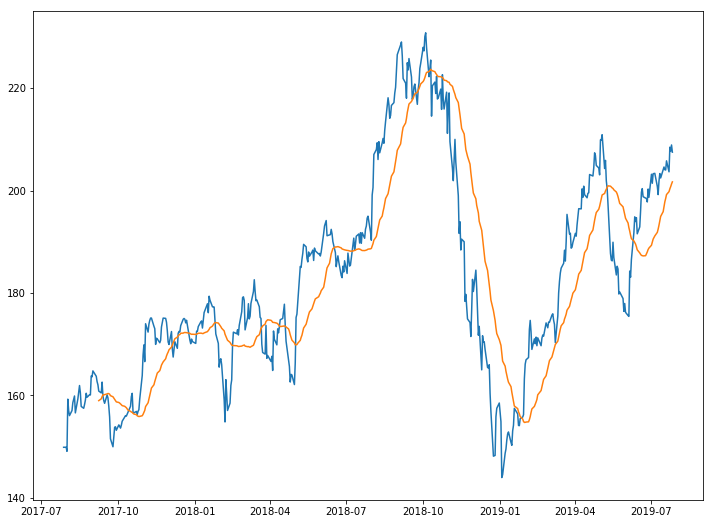

In [14]:
plt.figure(figsize=(12,9))
plt.plot(df['Open'])
plt.plot(df['Open'].rolling(30).mean())

## `.diff()`
---
The `.diff()` calculates the difference in a value between a value at time $T$ and that same value at $T-1$. For example, if I have a dataframe of stock prices:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>100</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>110</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>

When I call `.diff()`, I get the following:
<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>10</td>
    </tr>
  </tbody>
</table>
<div style="clear: both;"></div>


In [15]:
df.diff().head()

Open      High       Low     Close  Adj Close      Volume
Date                                                                      
2017-07-28        NaN       NaN       NaN       NaN        NaN         NaN
2017-07-31   0.009995  0.100006 -1.059997 -0.770004  -0.746872   2632200.0
2017-08-01  -0.799988 -0.110001  0.279999  1.320007   1.280335  15522700.0
2017-08-02  10.179993  9.529999  7.750000  7.089996   6.876785  34568200.0
2017-08-03  -2.229996 -2.539993 -1.140000 -1.569992  -1.522797 -42839500.0

## `.pct_change()` 
---

`.pct_change()` works similar to `.diff()`, except we're calculating the difference as a change in percentage: $X_{t}/X_{t-1} - 1$

So if I have my table of stock prices:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>100</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>110</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>

The `.pct_change()` will look like this:

<table style="float: left;">
  <thead>
    <tr>
      <th></th>
      <th>Close</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1-1-2019</th>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1-2-2019</th>
      <td>.1</td>
    </tr>
  </tbody>
</table>

<div style="clear: both;"></div>


We'd interpret 1-2-2019 as a 10% increase (110/100 - 1 = .10) in price from the day before. Again, the first row is a `NaN` since there is no prior row to calcuate the percent change from.

In [16]:
df.pct_change().head()

Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2017-07-28       NaN       NaN       NaN       NaN        NaN       NaN
2017-07-31  0.000067  0.000666 -0.007105 -0.005151  -0.005151  0.152913
2017-08-01 -0.005337 -0.000732  0.001890  0.008875   0.008875  0.782162
2017-08-02  0.068276  0.063440  0.052220  0.047251   0.047251  0.977370
2017-08-03 -0.014000 -0.015900 -0.007300 -0.009991  -0.009991 -0.612546

## Challenge
---

Create three **separate** plots:
1. One for the `Close` price
2. One for the `Close` price, using `.diff()`
3. One for the `Close` price as a percent change.

What happens to your overall data when you diff? Is this good or bad?

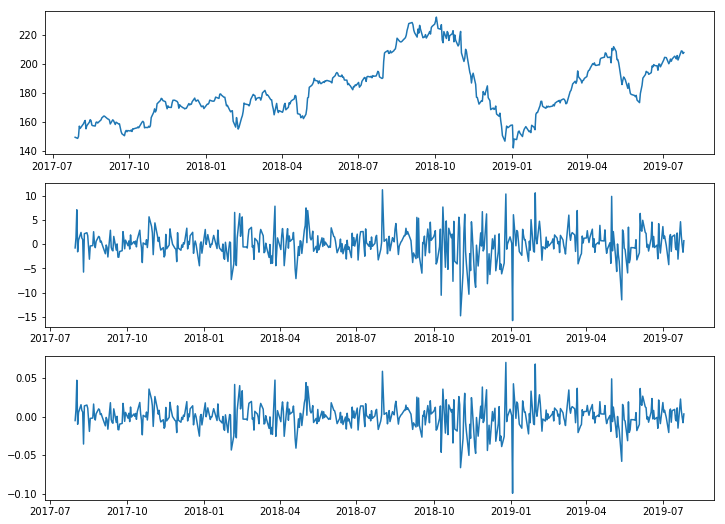

In [17]:
fig, axes = plt.subplots(nrows=3, figsize=(12,9))
axes[0].plot(df.Close)
axes[1].plot(df.Close.diff())
axes[2].plot(df.Close.pct_change())

## Volatility
---

The volatility for AAPL can be thought of as the standard deviation of the returns (`.pct_change()`). We can use the `.rolling()` method to see how AAPL's volatility changes over time.

In the cell below, plot the 10 day rolling standard deviation of APPL's returns for `Close` (**THAT'S A MOUTHFUL!**)

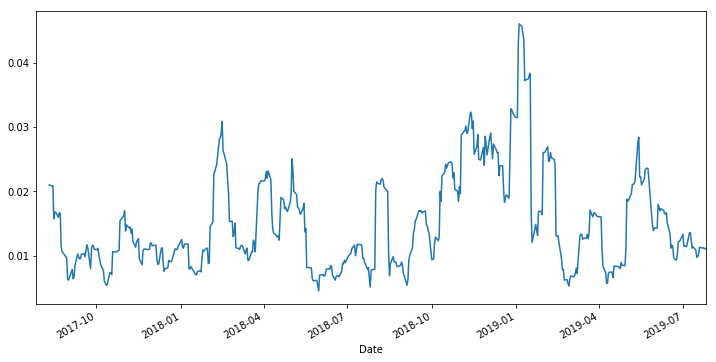

In [18]:
plt.figure(figsize=(12,6))
df.Close.pct_change().rolling(10).std().plot()

## Shifting
---

`df.shift()` is used to bring values from previous dates forward in time.

In [19]:
df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-07-28  149.889999  150.229996  149.190002  149.500000  145.004379   
2017-07-31  149.899994  150.330002  148.130005  148.729996  144.257507   
2017-08-01  149.100006  150.220001  148.410004  150.050003  145.537842   
2017-08-02  159.279999  159.750000  156.160004  157.139999  152.414627   
2017-08-03  157.050003  157.210007  155.020004  155.570007  150.891830   

              Volume  
Date                  
2017-07-28  17213700  
2017-07-31  19845900  
2017-08-01  35368600  
2017-08-02  69936800  
2017-08-03  27097300

In [20]:
df.shift().head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-07-28         NaN         NaN         NaN         NaN         NaN   
2017-07-31  149.889999  150.229996  149.190002  149.500000  145.004379   
2017-08-01  149.899994  150.330002  148.130005  148.729996  144.257507   
2017-08-02  149.100006  150.220001  148.410004  150.050003  145.537842   
2017-08-03  159.279999  159.750000  156.160004  157.139999  152.414627   

                Volume  
Date                    
2017-07-28         NaN  
2017-07-31  17213700.0  
2017-08-01  19845900.0  
2017-08-02  35368600.0  
2017-08-03  69936800.0

## Creating a simple dataset
---

Let's create a simple dataset that tries to predict today's `Close` price using yesterday's `Close` price with today's `Open` price. 

In [21]:
pd.concat([
    df[['Close']].rename(columns={'Close': 'y'}),
    df[['Close']].shift().rename(columns={'Close': 'prev_close'}),
    df[['Open']].rename(columns={'Open': 'open'})
], axis=1).head()

y  prev_close        open
Date                                          
2017-07-28  149.500000         NaN  149.889999
2017-07-31  148.729996  149.500000  149.899994
2017-08-01  150.050003  148.729996  149.100006
2017-08-02  157.139999  150.050003  159.279999
2017-08-03  155.570007  157.139999  157.050003